In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform=transforms.ToTensor()
train_dataset=datasets.MNIST(root='./data',train=True,download=True,transform=transform)
test_dataset=datasets.MNIST(root='./data',train=False,download=True,transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 64.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.73MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.9MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.7MB/s]


In [3]:
batch_size=64
train_loader=DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True)

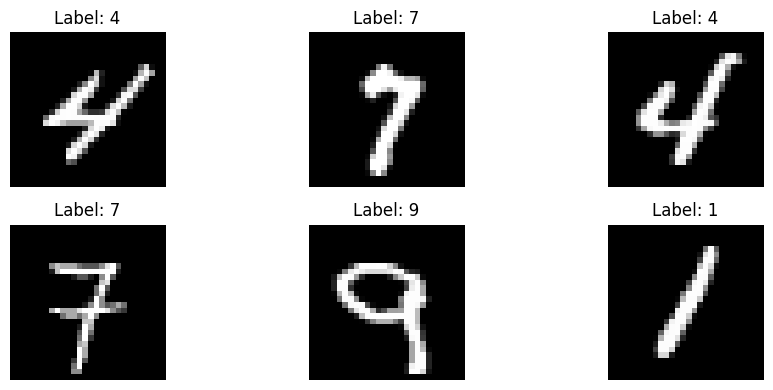

In [7]:

images, labels = next(iter(train_loader))

# Plot the first 6 images in the batch
plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [16]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv_layer = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3),  # -> (batch, 16, 26, 26)
            nn.ReLU(),
            nn.MaxPool2d(2),                 # -> (batch, 16, 13, 13)

            nn.Conv2d(16, 32, kernel_size=3), # -> (batch, 32, 11, 11)
            nn.ReLU(),
            nn.MaxPool2d(2)                   # -> (batch, 32, 5, 5)
        )

        self.fc_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 5 * 5, 10)  # Final output → 10 classes
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x


In [17]:
#instiate the model
model=CNN()
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [18]:
epochs=5
for epochs in range(epochs):
  running_loss=0.0

  for images, labels in train_loader:
    optimizer.zero_grad()
    outputs=model(images)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()

  print(f"Epoch {epochs+1}/{epochs}, Loss: {running_loss/len(train_loader)}")



Epoch 1/0, Loss: 0.2462564519554901
Epoch 2/1, Loss: 0.07687109502018499
Epoch 3/2, Loss: 0.057887847700751005
Epoch 4/3, Loss: 0.04875229216063582
Epoch 5/4, Loss: 0.040976768073840326


In [19]:
model.eval()

correct=0
total=0
with torch.no_grad():
  for images, labels in test_loader:
    outputs=model(images)
    _, predicted=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()

print(f"Test Accuracy: {100*correct/total}%")

Test Accuracy: 98.6%
